In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, r2_score
import time
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler

In [15]:
housing_df = pd.read_csv("data/CaliforniaHousing.csv")
housing_df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [16]:
categorical = housing_df.filter(['ocean_proximity'])
myMapCat = {'NEAR BAY': 1, 'NEAR OCEAN': 2, '<1H OCEAN': 3, 'INLAND': 4, 'ISLAND': 5}
newCat = categorical.replace(myMapCat)

C:\Users\alber\AppData\Local\Temp\ipykernel_13656\3437574544.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  newCat = categorical.replace(myMapCat)


In [17]:
numerical = housing_df.drop(columns=['ocean_proximity'], axis=1)

In [18]:
imputer = SimpleImputer(strategy='median')
numerical_imputed = pd.DataFrame(imputer.fit_transform(numerical), columns=numerical.columns)

In [21]:
scaler = StandardScaler()
numerical_scaled = pd.DataFrame(scaler.fit_transform(numerical_imputed), columns=numerical.columns)

In [22]:
processed_data = pd.concat([numerical_scaled, newCat], axis=1)

In [23]:
# Extract features and labels

X = processed_data.drop(['median_house_value'], axis=1)
y = processed_data['median_house_value']

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=0)

In [52]:
# Initialize models
n_estimators=10
rf = RandomForestRegressor(n_estimators=n_estimators, random_state=42)
xgb = XGBRegressor(n_estimators=n_estimators, random_state=42)

In [53]:
# Fit models
# Measure training time for Random Forest
start_time_rf = time.time()
rf.fit(X_train, y_train)
end_time_rf = time.time()
rf_train_time = end_time_rf - start_time_rf

# Measure training time for XGBoost
start_time_xgb = time.time()
xgb.fit(X_train, y_train)
end_time_xgb = time.time()
xgb_train_time = end_time_xgb - start_time_xgb

In [54]:
# Measure prediction time for Random Forest
start_time_rf = time.time()
y_pred_rf = rf.predict(X_test)
end_time_rf = time.time()
rf_pred_time = end_time_rf - start_time_rf

# Measure prediction time for XGBoost
start_time_xgb = time.time()
y_pred_xgb = xgb.predict(X_test)
end_time_xgb = time.time()
xgb_pred_time = end_time_xgb - start_time_xgb


In [55]:
rmse_rf = np.sqrt(mean_squared_error(y_test, y_pred_rf))
rmse_xgb = np.sqrt(mean_squared_error(y_test, y_pred_xgb))
r2_rf = r2_score(y_test, y_pred_rf)
r2_xgb = r2_score(y_test, y_pred_xgb)

In [ ]:
# 100 estimators

In [48]:
print("PERFORMANCE METRICS: Random Forest Regression model")
print("R-squared:", r2_rf)
print("Root Mean Squared Error:", rmse_rf)

PERFORMANCE METRICS: Random Forest Regression model
R-squared: 0.816187390293382
Root Mean Squared Error: 0.42900515208902207


In [49]:
print("PERFORMANCE METRICS: XGB Regression model")
print("R-squared:", r2_xgb)
print("Root Mean Squared Error:", rmse_xgb)

PERFORMANCE METRICS: XGB Regression model
R-squared: 0.826642061557126
Root Mean Squared Error: 0.41662634065001336


In [50]:
# random forest has a long training time due to large number of estimators used

In [51]:
print(f'Random Forest:  Training Time = {rf_train_time:.3f} seconds, Testing time = {rf_pred_time:.3f} seconds')
print(f'      XGBoost:  Training Time = {xgb_train_time:.3f} seconds, Testing time = {xgb_pred_time:.3f} seconds')

Random Forest:  Training Time = 8.882 seconds, Testing time = 0.142 seconds
      XGBoost:  Training Time = 0.111 seconds, Testing time = 0.004 seconds


In [ ]:
# 10 estimators

In [56]:
print("PERFORMANCE METRICS: Random Forest Regression model")
print("R-squared:", r2_rf)
print("Root Mean Squared Error:", rmse_rf)

PERFORMANCE METRICS: Random Forest Regression model
R-squared: 0.7919029974190072
Root Mean Squared Error: 0.4564653011796515


In [57]:
print("PERFORMANCE METRICS: XGB Regression model")
print("R-squared:", r2_xgb)
print("Root Mean Squared Error:", rmse_xgb)

PERFORMANCE METRICS: XGB Regression model
R-squared: 0.7608717763968365
Root Mean Squared Error: 0.4893169681244001


In [58]:
print(f'Random Forest:  Training Time = {rf_train_time:.3f} seconds, Testing time = {rf_pred_time:.3f} seconds')
print(f'      XGBoost:  Training Time = {xgb_train_time:.3f} seconds, Testing time = {xgb_pred_time:.3f} seconds')

Random Forest:  Training Time = 0.934 seconds, Testing time = 0.024 seconds
      XGBoost:  Training Time = 0.026 seconds, Testing time = 0.005 seconds


In [33]:
std_y = np.std(y_test)

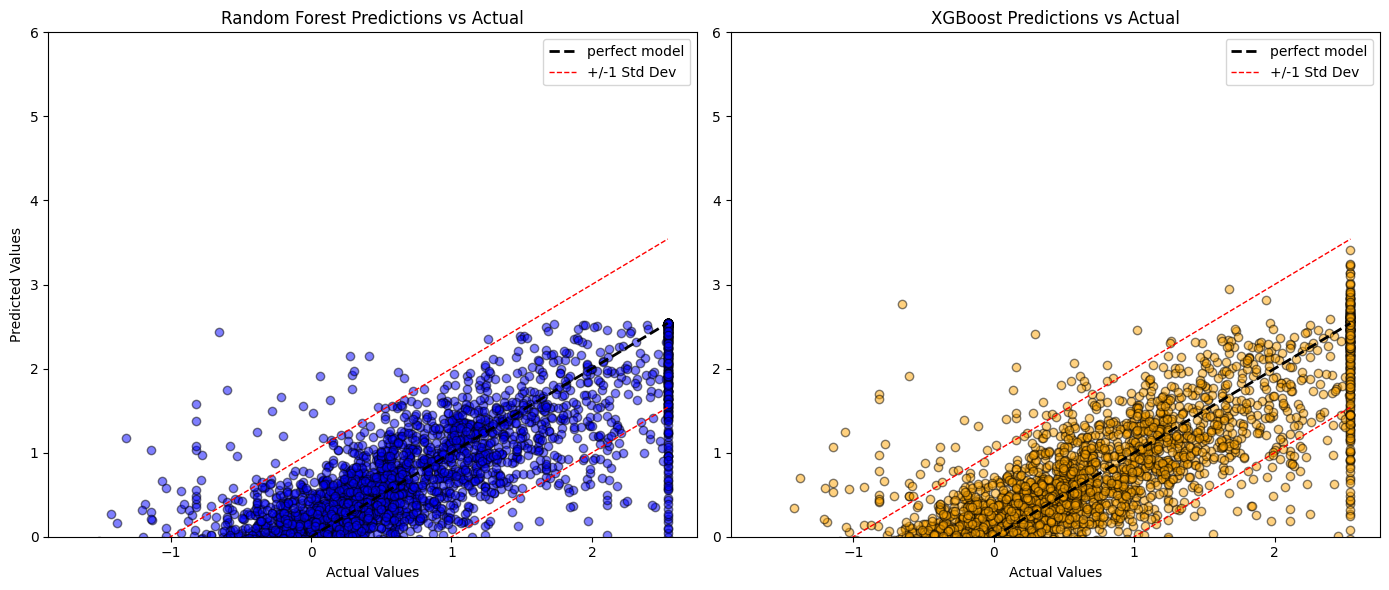

In [34]:
plt.figure(figsize=(14, 6))

# Random Forest plot
plt.subplot(1, 2, 1)
plt.scatter(y_test, y_pred_rf, alpha=0.5, color="blue",ec='k')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2,label="perfect model")
plt.plot([y_test.min(), y_test.max()], [y_test.min() + std_y, y_test.max() + std_y], 'r--', lw=1, label="+/-1 Std Dev")
plt.plot([y_test.min(), y_test.max()], [y_test.min() - std_y, y_test.max() - std_y], 'r--', lw=1, )
plt.ylim(0,6)
plt.title("Random Forest Predictions vs Actual")
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.legend()


# XGBoost plot
plt.subplot(1, 2, 2)
plt.scatter(y_test, y_pred_xgb, alpha=0.5, color="orange",ec='k')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2,label="perfect model")
plt.plot([y_test.min(), y_test.max()], [y_test.min() + std_y, y_test.max() + std_y], 'r--', lw=1, label="+/-1 Std Dev")
plt.plot([y_test.min(), y_test.max()], [y_test.min() - std_y, y_test.max() - std_y], 'r--', lw=1, )
plt.ylim(0,6)
plt.title("XGBoost Predictions vs Actual")
plt.xlabel("Actual Values")
plt.legend()
plt.tight_layout()
plt.show()

In [ ]:
# random forest uses bagging (runs on random subsets) and takes the average of the constructed set of trees (parallel)
# xgboost uses boosting taking sequential learners correcting the mistakes of weak learners (sequential)
# both are ex. of ensemble learning

# note
# random forest never surpasses the max value in the dataset (approx. 2.5)
# xgboost overshoots the max value in the dataset perhaps because of over corrections made to previous learners while 
# random forest is just taking the average of a set of learners